Accuracy: 0.50
Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



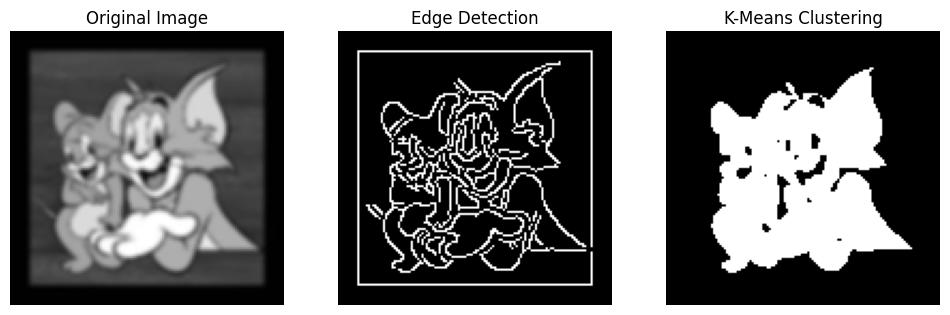

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage import io, color
from sklearn.cluster import KMeans

# Load and preprocess image
def load_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

def extract_edges(image):
    return cv2.Canny(image, 50, 150)

def extract_lbp(image):
    return local_binary_pattern(image, P=8, R=1, method='uniform')

def extract_glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    return np.array([contrast, energy])

# Load image
image_path = 'download.jpeg'
image = load_preprocess_image(image_path)

# Feature Extraction
edges = extract_edges(image)
lbp = extract_lbp(image)
glcm_features = extract_glcm_features(image)

# Pattern Classification using K-Means Clustering
image_flattened = image.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=42).fit(image_flattened)
kmeans_result = kmeans.labels_.reshape(image.shape)

# Simulated dataset with multiple samples
X = np.random.rand(10, 2)  # Create 10 samples with 2 features each
y = np.random.randint(0, 2, 10)  # Generate 10 binary labels (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Display results
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[1].imshow(edges, cmap='gray')
axs[1].set_title("Edge Detection")
axs[2].imshow(kmeans_result, cmap='gray')
axs[2].set_title("K-Means Clustering")

for ax in axs:
    ax.axis("off")
plt.show()


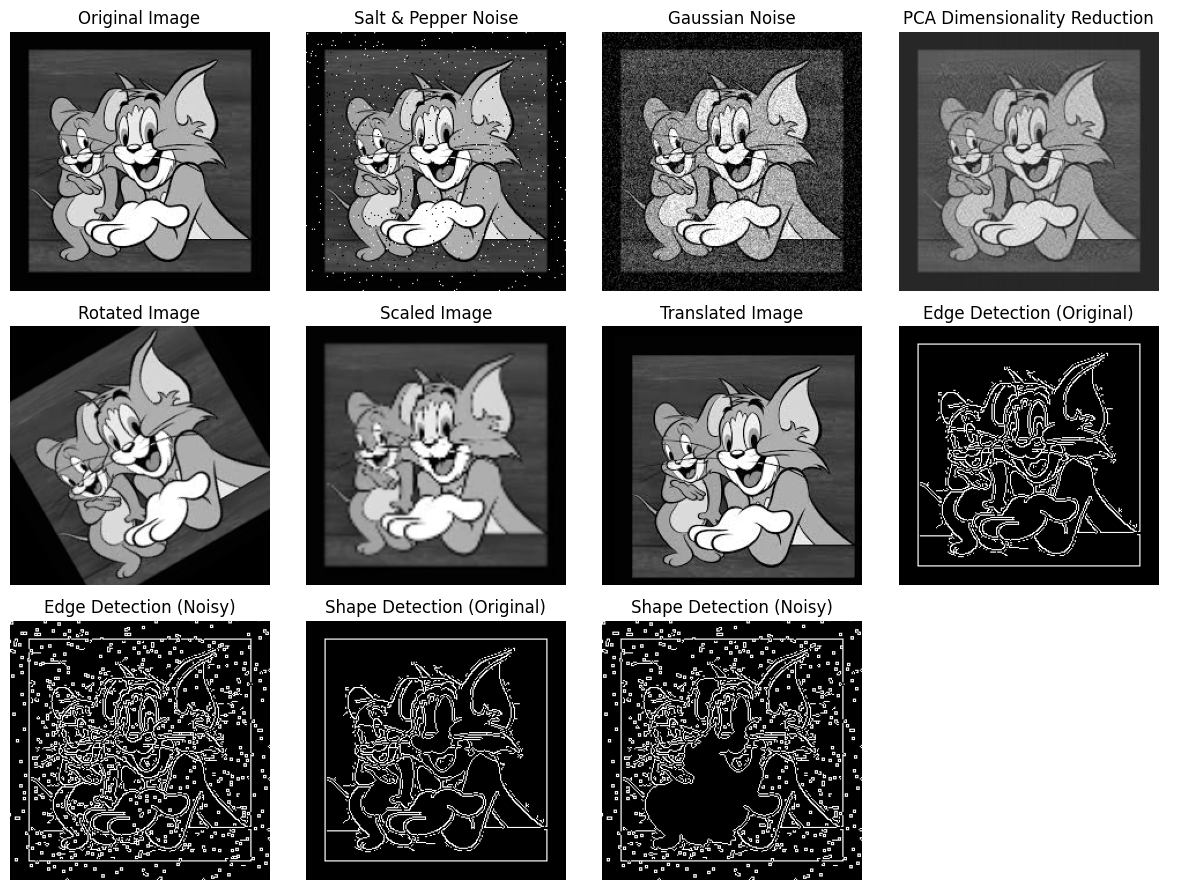

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from sklearn.decomposition import PCA

def add_salt_and_pepper_noise(image, amount=0.02):
    noisy_image = random_noise(image, mode='s&p', amount=amount)
    return (noisy_image * 255).astype(np.uint8)

def add_gaussian_noise(image, mean=0, var=0.01):
    noisy_image = random_noise(image, mode='gaussian', mean=mean, var=var)
    return (noisy_image * 255).astype(np.uint8)

def apply_transformations(image):
    rows, cols = image.shape
    
    # Rotation
    M_rotate = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1)
    rotated = cv2.warpAffine(image, M_rotate, (cols, rows))
    
    # Scaling
    scaled = cv2.resize(image, (cols//2, rows//2))
    scaled = cv2.resize(scaled, (cols, rows))
    
    # Translation
    M_translate = np.float32([[1, 0, 10], [0, 1, 10]])
    translated = cv2.warpAffine(image, M_translate, (cols, rows))
    
    return rotated, scaled, translated

def apply_pca(image, n_components=50):
    pca = PCA(n_components=n_components)
    reshaped_image = image.reshape(-1, image.shape[1])
    reduced = pca.fit_transform(reshaped_image)
    restored = pca.inverse_transform(reduced)
    return restored.reshape(image.shape)

def extract_edges(image):
    return cv2.Canny(image, 50, 150)

def detect_shapes(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shape_image = np.zeros_like(image)
    cv2.drawContours(shape_image, contours, -1, 255, 1)
    return shape_image

# Load and preprocess image
gray_image = cv2.imread('download.jpeg', cv2.IMREAD_GRAYSCALE)
salt_pepper_noisy = add_salt_and_pepper_noise(gray_image)
gaussian_noisy = add_gaussian_noise(gray_image)
rotated, scaled, translated = apply_transformations(gray_image)
dimensionality_reduced = apply_pca(gray_image)

# Feature extraction
edges_original = extract_edges(gray_image)
edges_noisy = extract_edges(salt_pepper_noisy)
shapes_original = detect_shapes(edges_original)
shapes_noisy = detect_shapes(edges_noisy)

# Display results
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(salt_pepper_noisy, cmap='gray')
axs[0, 1].set_title("Salt & Pepper Noise")
axs[0, 2].imshow(gaussian_noisy, cmap='gray')
axs[0, 2].set_title("Gaussian Noise")
axs[0, 3].imshow(dimensionality_reduced, cmap='gray')
axs[0, 3].set_title("PCA Dimensionality Reduction")

axs[1, 0].imshow(rotated, cmap='gray')
axs[1, 0].set_title("Rotated Image")
axs[1, 1].imshow(scaled, cmap='gray')
axs[1, 1].set_title("Scaled Image")
axs[1, 2].imshow(translated, cmap='gray')
axs[1, 2].set_title("Translated Image")
axs[1, 3].imshow(edges_original, cmap='gray')
axs[1, 3].set_title("Edge Detection (Original)")

axs[2, 0].imshow(edges_noisy, cmap='gray')
axs[2, 0].set_title("Edge Detection (Noisy)")
axs[2, 1].imshow(shapes_original, cmap='gray')
axs[2, 1].set_title("Shape Detection (Original)")
axs[2, 2].imshow(shapes_noisy, cmap='gray')
axs[2, 2].set_title("Shape Detection (Noisy)")

for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()